## Обзор проекта

Цель данного проекта — построить модель бинарной классификации, которая определяет,
является ли отзыв о фильме положительным или отрицательным.

В качестве данных используется датасет IMDb Movie Reviews, широко применяемый
в задачах анализа тональности текста (Sentiment Analysis).

В этом ноутбуке проводится разведочный анализ данных (EDA), целью которого является:
- изучение структуры датасета
- проверка качества данных
- анализ распределения классов
- анализ длины текстов
- обоснование этапов предобработки данных для моделей LSTM и BiLSTM

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import re

## Загрузка данных


In [3]:
df = pd.read_csv("C:\\Users\\nurs\\OneDrive\\Рабочий стол\\IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Структура данных


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


50000 объектов и 1 признак(review), с целевой переменной sentiment(positive/negative)

## Анализ пропущенных значений и дубликатов


In [5]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(418)

In [7]:
df = df.drop_duplicates()

Пропущенные значения в датасете отсутствуют.Дубликаты были обнаружены и удалены.

## Распределение классов


In [8]:
df["sentiment"].value_counts(normalize=True)

sentiment
positive    0.501876
negative    0.498124
Name: proportion, dtype: float64

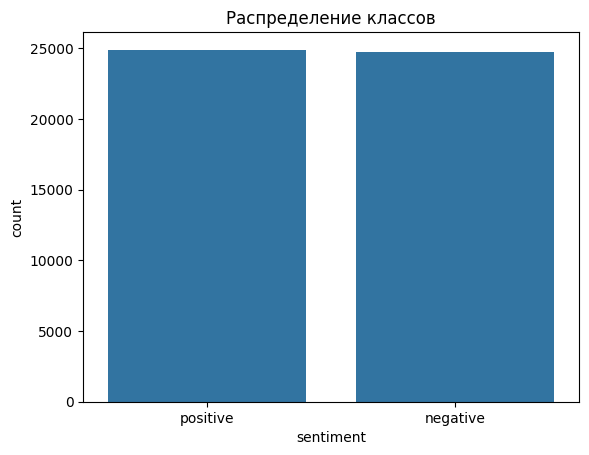

In [9]:
sns.countplot(x="sentiment", data=df)
plt.title("Распределение классов")
plt.show()

Датасет является сбалансированным: количество положительных и отрицательных отзывов
примерно одинаково.

## Анализ длины отзывов

In [10]:
df["review_len"] = df["review"].apply(lambda x: len(x.split()))
df["review_len"].describe()

count    49582.000000
mean       231.350167
std        171.542020
min          4.000000
25%        126.000000
50%        173.000000
75%        281.000000
max       2470.000000
Name: review_len, dtype: float64

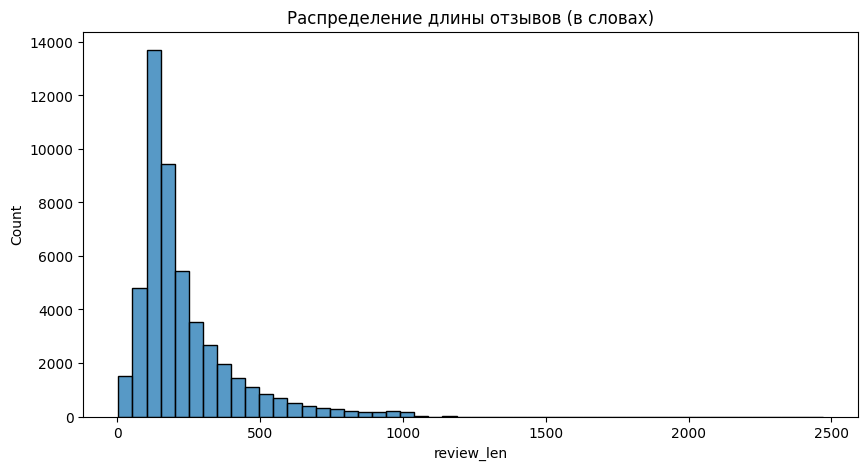

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df["review_len"], bins=50)
plt.title("Распределение длины отзывов (в словах)")
plt.show()

Распределение длины отзывов имеет длинный хвост.
Большинство отзывов содержит менее 400 слов, в то время как небольшое количество
отзывов является значительно более длинным.

## Длина отзывов по классам


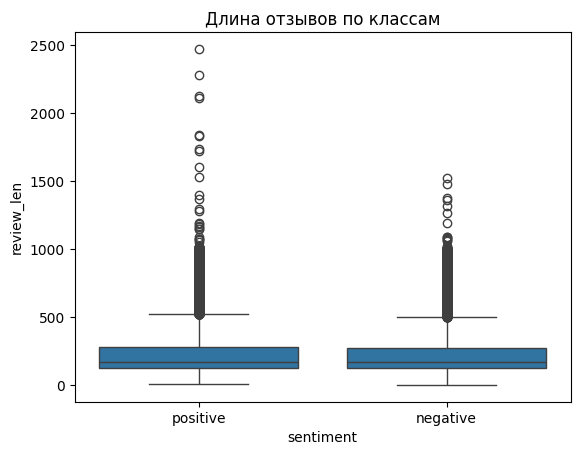

In [12]:
sns.boxplot(x="sentiment", y="review_len", data=df)
plt.title("Длина отзывов по классам")
plt.show()

Распределения длины отзывов для положительного и отрицательного классов
практически совпадают.

Это говорит о том, что длина текста сама по себе не определяет тональность отзыва.

## Анализ содержимого текста


In [13]:
df[df["sentiment"] == "positive"]["review"].iloc[0]
df[df["sentiment"] == "negative"]["review"].iloc[0]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

Ручной анализ текстов показывает:
- наличие HTML-тегов
- использование пунктуации
- разговорный стиль и сокращения
Это подтверждает необходимость очистки текста перед токенизацией.

## Частотный анализ слов


In [14]:
words = " ".join(df["review"]).lower().split()
Counter(words).most_common(20)

[('the', 633981),
 ('a', 314408),
 ('and', 311378),
 ('of', 284608),
 ('to', 262599),
 ('is', 203488),
 ('in', 178487),
 ('i', 140393),
 ('this', 137398),
 ('that', 129179),
 ('it', 128655),
 ('/><br', 100211),
 ('was', 92494),
 ('as', 87592),
 ('with', 83950),
 ('for', 83880),
 ('but', 77270),
 ('on', 62404),
 ('movie', 61011),
 ('are', 56594)]

Наиболее частыми являются стоп-слова и HTML-связанные токены.
HTML-теги будут удалены в процессе предобработки,
в то время как стоп-слова сохраняются для сохранения контекста,
что особенно важно для рекуррентных нейронных сетей.

## Итоговый вывод по EDA

В ходе разведочного анализа данных было установлено:
- датасет является чистым и сбалансированным
- пропущенные значения отсутствуют
- дубликаты были удалены
- длина текстов имеет длиннохвостое распределение
- усечение и дополнение последовательностей являются необходимыми
- длина отзыва не является определяющим фактором тональности
- наличие HTML-тегов требует предварительной очистки текста

Полученные результаты обосновывают использование моделей LSTM и BiLSTM
для задачи классификации тональности текстов.